In [97]:
import torch
from transformers import BertForSequenceClassification,AutoModel,AutoModelForSequenceClassification
from transformers import BertTokenizer,AutoTokenizer

# tokenizer = AutoModel.from_pretrained('distilbert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('distilbert-base-uncased')

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [98]:
model.train()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [99]:
for param in model.base_model.parameters():
    param.requires_grad = False

In [100]:
def count_parameters(model):
    reset = "\033[0m"
    red =  "\033[0;31;40m" #RED
    
    table = PrettyTable(["Modules", "Parameters","Shape"])
    total_params = 0
    total_trainable_params = 0
    for name, parameter in model.named_parameters():
        param = parameter.numel()
        shape = parameter.size()
        total_params+=param
        
        if parameter.requires_grad:
            total_trainable_params+=param
            table.add_row([name, red + str(param) + reset,shape],)
        
        else:
            table.add_row([name, str(param),shape],)
    print(table)
    print()
    print(f"Total Params: {total_params}")
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)

+---------------------------------------------------------+------------+--------------------------+
|                         Modules                         | Parameters |          Shape           |
+---------------------------------------------------------+------------+--------------------------+
|       distilbert.embeddings.word_embeddings.weight      |  23440896  | torch.Size([30522, 768]) |
|     distilbert.embeddings.position_embeddings.weight    |   393216   |  torch.Size([512, 768])  |
|          distilbert.embeddings.LayerNorm.weight         |    768     |    torch.Size([768])     |
|           distilbert.embeddings.LayerNorm.bias          |    768     |    torch.Size([768])     |
|  distilbert.transformer.layer.0.attention.q_lin.weight  |   589824   |  torch.Size([768, 768])  |
|   distilbert.transformer.layer.0.attention.q_lin.bias   |    768     |    torch.Size([768])     |
|  distilbert.transformer.layer.0.attention.k_lin.weight  |   589824   |  torch.Size([768, 768])  |


66955010

In [102]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=1e-5)

In [103]:
text_batch = ["I love Pixar.", "I don't care for Pixar."]
encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

In [131]:
epochs = 1000
losses,logits = [],[]

for n_epoch in range(epochs):
    outputs = model(input_ids, attention_mask=attention_mask, labels=torch.tensor([1,0]))

    loss = outputs.loss
    loss.backward()
    
    losses.append(loss.item())
    logits.append(outputs.logits)
    
    optimizer.step()

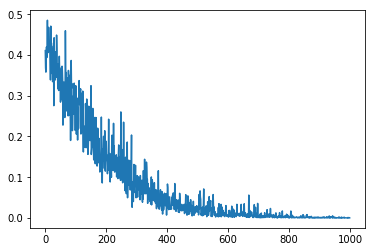

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(losses)

In [155]:
model.eval()

my_string= '''I don't love Pixar!!'''
encoded_str = tokenizer([my_string],return_tensors='pt',padding=True,truncation=True)

input_ids = encoded_str['input_ids']
attention_mask = encoded_str['attention_mask']

In [156]:
outputs = model(input_ids, attention_mask=attention_mask)

In [157]:
from torch.nn import Softmax

softmax = Softmax(dim=1)
softmax(outputs.logits)

tensor([[0.0010, 0.9990]], grad_fn=<SoftmaxBackward>)